# Getting Started with Complexplorer

Welcome to Complexplorer! This notebook will guide you through your first steps in visualizing complex functions.

## What You'll Learn

1. Basic setup and imports
2. Creating your first visualization
3. Understanding domains (Rectangle, Disk, Annulus)
4. Using colormaps for enhanced visualizations
5. Introduction to high-quality 3D plots with PyVista

Let's begin!

## Installation

If you haven't installed complexplorer yet:

```bash
# Basic installation
pip install complexplorer

# With PyVista for high-quality 3D (recommended)
pip install "complexplorer[pyvista]"

# Or install everything
pip install "complexplorer[all]"
```

## Basic Imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import complexplorer as cp

# Check if PyVista is available
try:
    import pyvista
    HAS_PYVISTA = True
    print("✓ PyVista is available for high-quality 3D visualizations")
except ImportError:
    HAS_PYVISTA = False
    print("ℹ PyVista not installed. Install with: pip install 'complexplorer[pyvista]'")
    print("  You can still use matplotlib for 3D (slower, lower quality)")

✓ PyVista is available for high-quality 3D visualizations


## Your First Visualization

Let's start with a simple polynomial function: $f(z) = z^2$

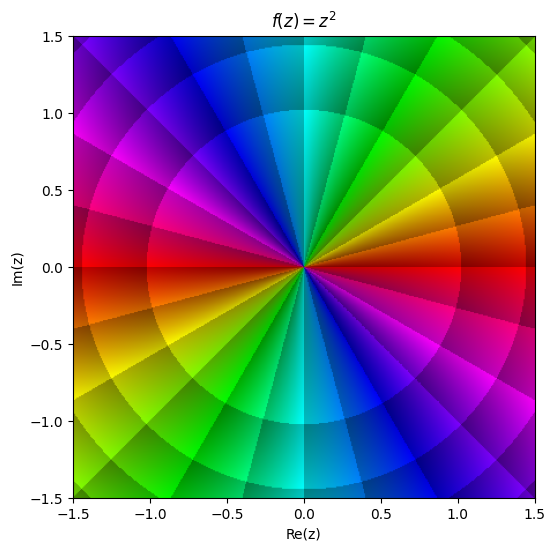

In [18]:
# Define a complex function
def f(z):
    return z**2

# Create a domain (region of complex plane to visualize)
domain = cp.Rectangle(3, 3)  # 3x3 rectangle centered at origin

# Create visualization
fig, ax = plt.subplots(figsize=(6, 6))
cp.plot(domain, f, ax=ax)
ax.set_title(r"$f(z) = z^2$")
plt.show()

### Understanding the Visualization

- **Colors represent phase**: The hue shows the argument (angle) of the complex number
- **Red = positive real** (phase = 0)
- **Cyan = negative real** (phase = π)
- **Green/Yellow = positive imaginary**
- **Blue/Magenta = negative imaginary**

Notice how $f(z) = z^2$ doubles the phase angle!

## Side-by-Side Visualization

Often it's helpful to see the domain and codomain side by side:

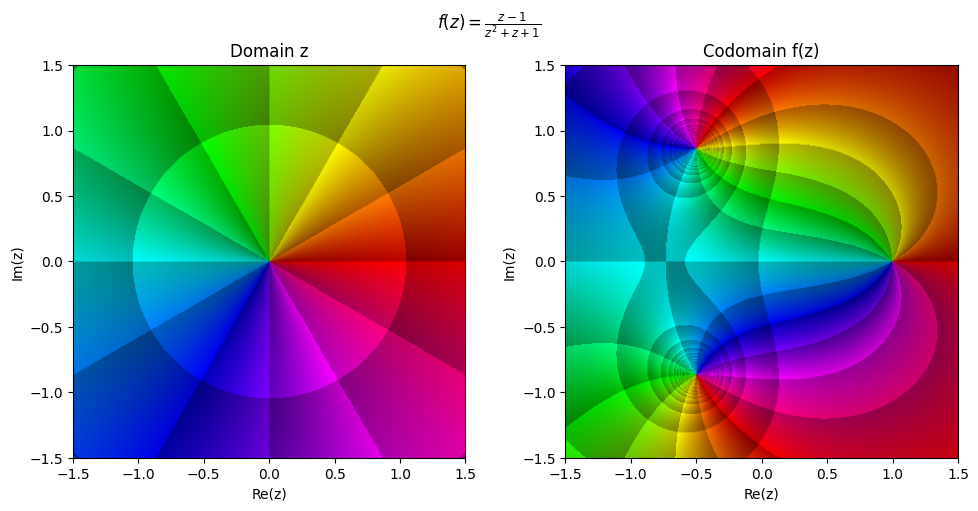

In [19]:
# A more interesting function
def f(z):
    return (z - 1) / (z**2 + z + 1)

# Side-by-side plot
fig = cp.pair_plot(domain, f, title=r"$f(z) = \frac{z - 1}{z^2 + z + 1}$")
plt.show()

## Working with Different Domains

Complexplorer supports various domain shapes:

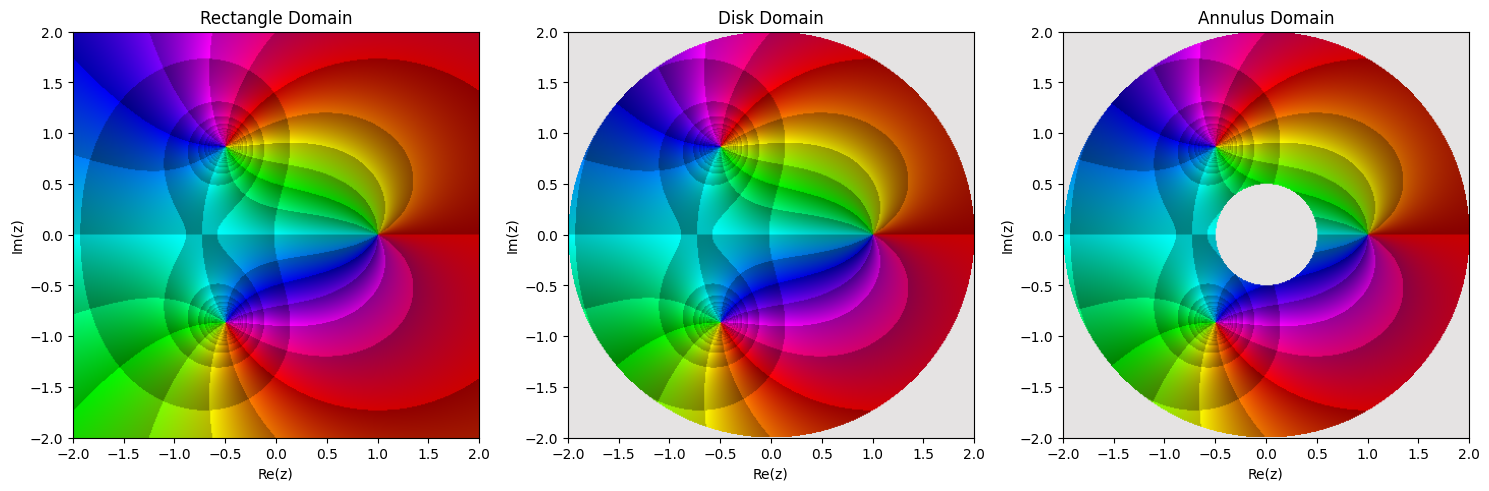

In [20]:
# Rectangle domain
rect = cp.Rectangle(re_length=4, im_length=3, center=0+0j, )

# Disk domain
disk = cp.Disk(radius=2, center=0+0j)

# Annulus (ring) domain
annulus = cp.Annulus(inner_radius=0.5, outer_radius=2, center=0+0j)

# Visualize the same function on different domains
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cp.plot(rect, f, ax=axes[0])
axes[0].set_title("Rectangle Domain")

cp.plot(disk, f, ax=axes[1])
axes[1].set_title("Disk Domain")

cp.plot(annulus, f, ax=axes[2])
axes[2].set_title("Annulus Domain")

plt.tight_layout()
plt.show()

## Enhanced Phase Portraits

Basic phase portraits show only the argument. Enhanced phase portraits also encode the modulus (magnitude):

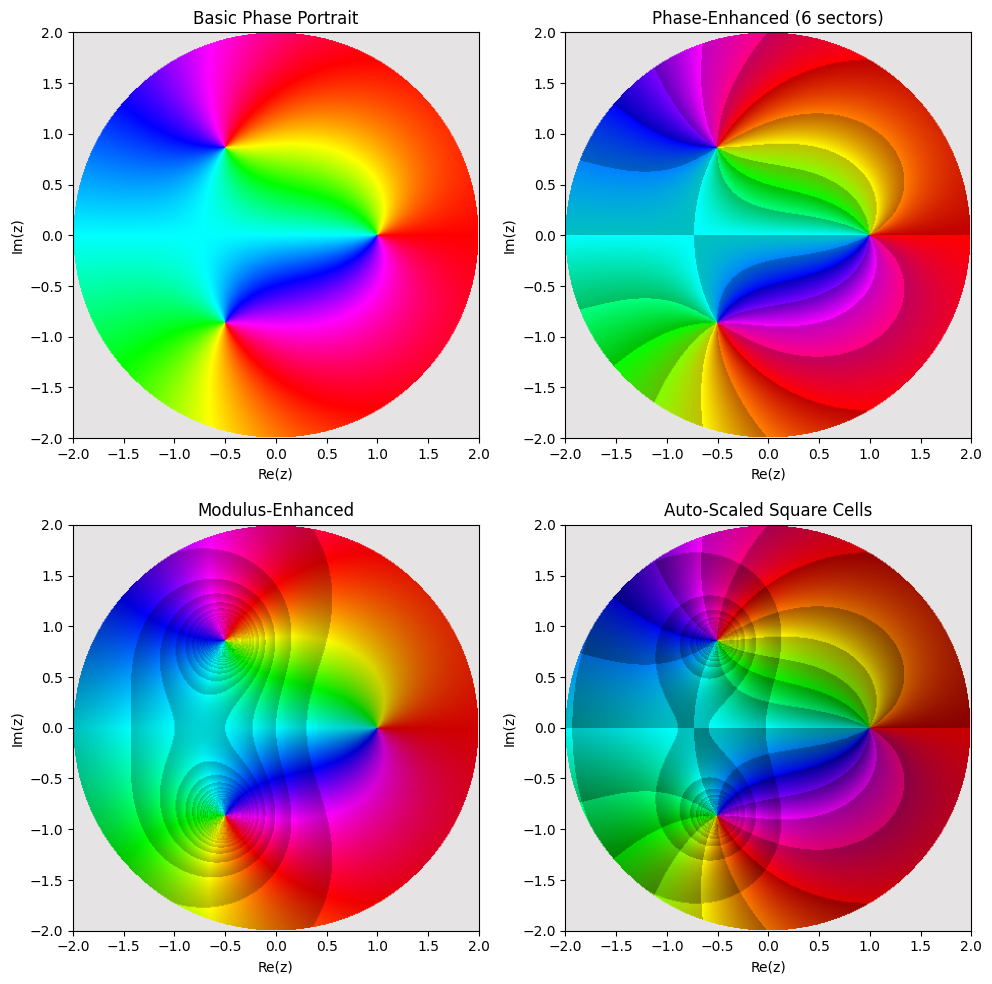

In [21]:
# Basic phase portrait
basic_cmap = cp.Phase()

# Enhanced with phase sectors
phase_enhanced = cp.Phase(n_phi=6)  # 6 phase sectors

# Enhanced with modulus contours
modulus_enhanced = cp.Phase(r_linear_step=0.5)  # Contours every 0.5 units

# Both enhancements with auto-scaling
auto_scaled = cp.Phase(n_phi=6, auto_scale_r=True)  # Automatically creates square cells

# Compare them
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

cp.plot(disk, f, cmap=basic_cmap, ax=axes[0,0])
axes[0,0].set_title("Basic Phase Portrait")

cp.plot(disk, f, cmap=phase_enhanced, ax=axes[0,1])
axes[0,1].set_title("Phase-Enhanced (6 sectors)")

cp.plot(disk, f, cmap=modulus_enhanced, ax=axes[1,0])
axes[1,0].set_title("Modulus-Enhanced")

cp.plot(disk, f, cmap=auto_scaled, ax=axes[1,1])
axes[1,1].set_title("Auto-Scaled Square Cells")

plt.tight_layout()
plt.show()

## Introduction to 3D Visualization

Now let's explore 3D visualizations. If you have PyVista installed, we'll use it for high-quality, fast rendering.

### ⚠️ Important: Quality in Jupyter Notebooks

When using PyVista in Jupyter:
- **`notebook=False`** → Opens external window with **full quality** ✨
- **`notebook=True`** → Shows inline but with **severe aliasing** 😞

We'll use `notebook=False` for the best experience!

In [28]:
if HAS_PYVISTA:
    print("Using PyVista for high-quality 3D visualization")
    print("A new window will open with interactive 3D plot...")
    
    # High-quality 3D landscape
    # notebook=False opens external window with full quality
    plotter = cp.plot_landscape_pv(
        domain=disk,
        func=f,
        cmap=auto_scaled,
        z_max=5,  # Limit z-axis for better view
        resolution=800,
        notebook=False,  # This is key for quality!
    )
    
    print("\n✓ External window opened with interactive 3D plot")
    print("  - Use mouse to rotate, zoom, pan")
    print("  - Press 'q' to close the window")
    
else:
    print("Using matplotlib for 3D (slower, lower quality)")
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    cp.plot_landscape(disk, func=f, cmap=auto_scaled, ax=ax, resolution=500)
    plt.show()

Using PyVista for high-quality 3D visualization
A new window will open with interactive 3D plot...

✓ External window opened with interactive 3D plot
  - Use mouse to rotate, zoom, pan
  - Press 'q' to close the window


### Quality Comparison

Let's see the difference between inline and external window quality:

In [29]:
if HAS_PYVISTA:
    print("First, let's see the LOW QUALITY inline version:")
    
    # Low quality inline version
    cp.plot_landscape_pv(
        domain=cp.Rectangle(2, 2),
        func=lambda z: z**3 - z,
        resolution=500,
        z_max=5,
        notebook=True,  # Inline = aliasing issues
        show=True,
        window_size=(600, 400)
    )
    
    print("\nNotice the jagged edges and poor anti-aliasing?")
    print("\nNow let's see the HIGH QUALITY external window:")
    print("(A new window will open)")
    
    # High quality external version
    cp.plot_landscape_pv(
        domain=cp.Rectangle(2, 2),
        func=lambda z: z**3 - z,
        resolution=500,
        z_max=5,
        notebook=False,  # External = full quality
        show=True
    )
    
    print("\n✨ Much better! Always use notebook=False for quality.")

First, let's see the LOW QUALITY inline version:


Widget(value='<iframe src="http://localhost:41661/index.html?ui=P_0x7f6430470380_2&reconnect=auto" class="pyvi…


Notice the jagged edges and poor anti-aliasing?

Now let's see the HIGH QUALITY external window:
(A new window will open)

✨ Much better! Always use notebook=False for quality.


## Performance Benefits

PyVista is not just higher quality, it's also **15-30x faster** than matplotlib for 3D:

In [24]:
if HAS_PYVISTA:
    import time
    
    # Time PyVista
    start = time.time()
    cp.plot_landscape_pv(disk, func=f, resolution=800, notebook=False, show=False, off_screen=True)
    pyvista_time = time.time() - start
    
    # Time matplotlib
    start = time.time()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    cp.plot_landscape(domain=disk, func=f, resolution=800, ax=ax)
    plt.close()
    matplotlib_time = time.time() - start
    
    print(f"PyVista time: {pyvista_time:.2f}s")
    print(f"Matplotlib time: {matplotlib_time:.2f}s")
    print(f"\nPyVista is {matplotlib_time/pyvista_time:.1f}x faster!")
else:
    print("Install PyVista to see performance comparison")

PyVista time: 0.73s
Matplotlib time: 10.78s

PyVista is 14.9x faster!


## Exercises

Now it's your turn! Try these exercises:

### Exercise 1: Explore Different Functions
Try visualizing these functions:
- $f(z) = z^3 - 1$ (cube roots of unity)
- $f(z) = \sin(z)$ (sine function)
- $f(z) = e^z$ (exponential)
- $f(z) = \frac{1}{z}$ (hint: use an Annulus domain to avoid the pole at 0)

<Axes: xlabel='Re(z)', ylabel='Im(z)'>

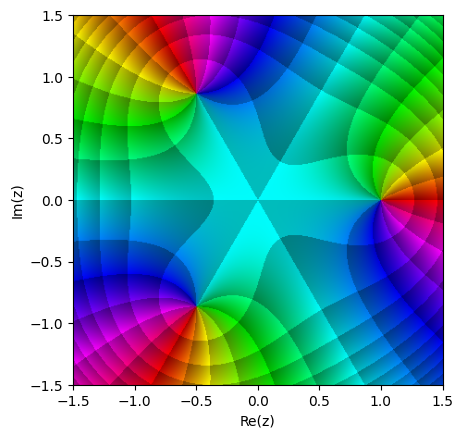

In [25]:
# Your code here
def my_func(z):
    return z**3 - 1  # Try different functions!

# Visualize it
cp.plot(domain, my_func)

### Exercise 2: Create Custom Domains
Try creating domains with different parameters:
- A tall rectangle (re_length=2, im_length=6)
- A disk centered at 1+i with radius 1.5
- A thin annulus (inner_radius=1.8, outer_radius=2.0)

In [26]:
# Your domain experiments here
# my_domain = cp.Rectangle(re_length=4, im_length=2)
# cp.plot(my_domain, f)

### Exercise 3: Experiment with Colormaps
Try different colormap parameters:
- Phase with different n_phi values (try 3, 8, 12)
- Different r_linear_step values
- Compare auto_scale_r=True with manual settings

In [27]:
# Your colormap experiments here
# my_cmap = Phase(...)
# plot(domain, f, cmap=my_cmap)

## Summary

You've learned:
1. ✓ How to create basic visualizations with `plot()`
2. ✓ Using different domains (Rectangle, Disk, Annulus)
3. ✓ Enhanced phase portraits with automatic scaling
4. ✓ High-quality 3D with PyVista (use `notebook=False`!)
5. ✓ Performance benefits of PyVista

## Next Steps

- Check out `advanced_features.ipynb` for:
  - More colormap types (Chessboard, PolarChessboard, LogRings)
  - Riemann sphere visualizations
  - STL export for 3D printing
  - Domain composition
  
- See `api_cookbook.ipynb` for:
  - Common function patterns
  - Best practices
  - Performance optimization

Happy exploring! 🌈